In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow import keras
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, GlobalMaxPooling1D

In [36]:
df = pd.read_csv("IMDBDataset.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [37]:
# Preprocess the text data
max_words = 10000
max_sequence_length = 500

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df['review'])

sequences = tokenizer.texts_to_sequences(df['review'])
x = pad_sequences(sequences, maxlen=max_sequence_length)

# Convert sentiment labels to numeric values
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

y = df['sentiment'].values

In [38]:
train_size = int(0.8 * len(df))
x_train, x_test = x[:train_size], x[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# from sklearn.model_selection import train_test_split

# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [39]:
model = Sequential()
model.add(Embedding(max_words, 100, input_length=max_sequence_length))
model.add(GlobalMaxPooling1D())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 500, 100)          1000000   
                                                                 
 global_max_pooling1d_4 (Glo  (None, 100)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_8 (Dense)             (None, 256)               25856     
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_9 (Dense)             (None, 1)                 257       
                                                                 
Total params: 1,026,113
Trainable params: 1,026,113
Non-trainable params: 0
____________________________________________

In [40]:
batch_size = 128
epochs = 10

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/10
313/313 [==============================] - 23s 72ms/step - loss: 0.4497 - accuracy: 0.7839 - val_loss: 0.2824 - val_accuracy: 0.8792
Epoch 2/10
313/313 [==============================] - 22s 71ms/step - loss: 0.2377 - accuracy: 0.9047 - val_loss: 0.2655 - val_accuracy: 0.8898
Epoch 3/10
313/313 [==============================] - 23s 72ms/step - loss: 0.1690 - accuracy: 0.9380 - val_loss: 0.2739 - val_accuracy: 0.8912
Epoch 4/10
313/313 [==============================] - 23s 72ms/step - loss: 0.1159 - accuracy: 0.9609 - val_loss: 0.2989 - val_accuracy: 0.8884
Epoch 5/10
313/313 [==============================] - 22s 72ms/step - loss: 0.0736 - accuracy: 0.9779 - val_loss: 0.3379 - val_accuracy: 0.8874
Epoch 6/10
313/313 [==============================] - 22s 72ms/step - loss: 0.0412 - accuracy: 0.9893 - val_loss: 0.4024 - val_accuracy: 0.8823
Epoch 7/10
313/313 [==============================] - 23s 72ms/step - loss: 0.0200 - accuracy: 0.9968 - val_loss: 0.4485 - val_accuracy:

In [41]:
# Generate predictions
y_pred_probs = model.predict(x_test)
y_pred = (y_pred_probs > 0.5).astype(int)

313/313 [==============================] - 2s 5ms/step


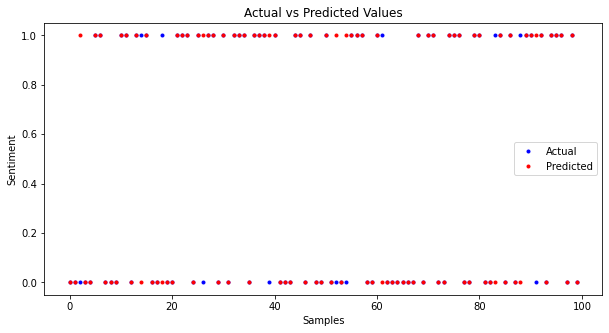

In [42]:
# Plot predicted vs actual values
plt.figure(figsize=(10, 5))
plt.plot(y_test[:100], 'b.', label='Actual')
plt.plot(y_pred[:100], 'r.', label='Predicted')
plt.title('Actual vs Predicted Values')
plt.xlabel('Samples')
plt.ylabel('Sentiment')
plt.legend()
plt.show()

In [43]:
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

313/313 [==============================] - 2s 6ms/step - loss: 0.5645 - accuracy: 0.8850
Test Loss: 0.5645328760147095
Test Accuracy: 0.8849999904632568


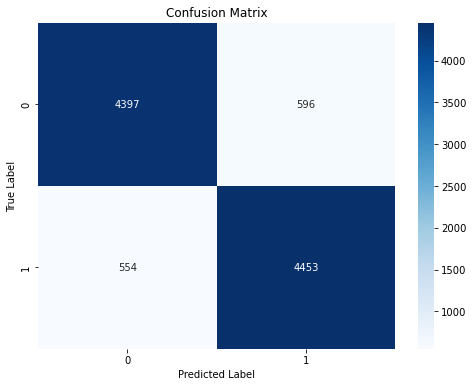

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.88      0.88      4993
           1       0.88      0.89      0.89      5007

    accuracy                           0.89     10000
   macro avg       0.89      0.88      0.88     10000
weighted avg       0.89      0.89      0.88     10000



In [44]:
cm = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("Classification Report:\n", classification_rep)

In [45]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_pred, y_test)

0.115